In [1]:
# Imports
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt
from scipy.stats import shapiro, levene, ttest_ind
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Loading the data
data = pd.read_csv('/Users/sararehman/Downloads/Truststudy_data/data.csv')
data

,participant,Age_1,Sex_1,Prior_Knowledge_1,Media_Consumption_1,Trust_in_Media_1,NS1_1,NS2_1,NS3_1,NS4_1,...,S14_1,S15_1,S16_1,S17_1,S18_1,S19_1,S20_1,TIME_start,TIME_end,TIME_total
0,s.4a8ba2ee-c6ae-450b-89e7-4fc36ed7df7f.txt,1,1,3,3,3,5.0,6.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-12-21-04,2023-11-12-21-16,12
1,s.883dcc74-9c62-47c4-8be0-7f7c1b9abc9c.txt,2,1,3,1,1,NaN,NaN,NaN,NaN,...,7.0,4.0,3.0,1.0,7.0,1.0,5.0,2023-11-08-17-00,2023-11-08-17-08,8
2,s.85e87deb-9b9f-4d48-9138-a71e52c495a8.txt,2,2,2,2,2,NaN,NaN,NaN,NaN,...,5.0,5.0,4.0,6.0,6.0,6.0,6.0,2023-11-08-10-28,2023-11-08-10-45,17
3,s.811b99f8-d7c5-4aac-ad2d-0b6fc49e31cf.txt,2,2,3,3,2,7.0,6.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11-02-58,2023-11-11-03-01,3
4,s.d33750cf-b0a3-474a-a3bb-50065994eb43.txt,1,1,2,2,1,NaN,NaN,NaN,NaN,...,5.0,2.0,5.0,4.0,6.0,6.0,3.0,2023-11-10-15-06,2023-11-10-15-08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,s.9bb41093-393c-4d77-8e6e-aefe7b27638e.txt,2,1,3,3,2,NaN,NaN,NaN,NaN,...,5.0,5.0,4.0,3.0,2.0,3.0,4.0,2023-11-08-14-09,2023-11-08-14-13,4
60,s.7811103d-69e4-4915-84f1-c994dd785f58.txt,1,2,3,3,2,5.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-08-13-58,2023-11-08-14-14,16
61,s.fae1b1cc-33eb-4ed0-a03e-ef5f6a42a91a.txt,2,2,1,3,2,NaN,NaN,NaN,NaN,...,5.0,4.0,6.0,4.0,5.0,4.0,4.0,2023-11-08-13-57,2023-11-08-14-09,12
62,s.c90364ca-a969-4282-a897-a40f120c18e2.txt,1,2,2,3,1,2.0,4.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-10-10-47,2023-11-10-10-50,3


In [3]:
# Use describe() to get a basic summary
summary = data.describe()

# Print the summary
print(summary)

           Age_1      Sex_1  Prior_Knowledge_1  Media_Consumption_1  \
count  64.000000  64.000000          64.000000            64.000000   
mean    1.796875   1.546875           2.234375             2.484375   
std     0.780307   0.561452           0.706931             0.617012   
min     1.000000   1.000000           1.000000             1.000000   
25%     1.000000   1.000000           2.000000             2.000000   
50%     2.000000   2.000000           2.000000             3.000000   
75%     2.000000   2.000000           3.000000             3.000000   
max     5.000000   3.000000           3.000000             3.000000   

       Trust_in_Media_1     NS1_1      NS2_1      NS3_1      NS4_1      NS5_1  \
count         64.000000  32.00000  32.000000  32.000000  32.000000  32.000000   
mean           1.656250   5.03125   5.000000   4.625000   4.937500   4.812500   
std            0.596784   2.02380   1.900764   1.680054   2.062531   1.730886   
min            1.000000   1.00000   

In [4]:
# Splitting the data into two separate dataframes

#non-sensational trust ratings
non_sensational_df = data[['participant','NS1_1','NS2_1','NS3_1','NS4_1','NS5_1','NS6_1','NS7_1','NS8_1','NS9_1','NS10_1']]
non_sensational_df = non_sensational_df.dropna()

#sensational trust ratings
sensational_df = data[['participant','S11_1','S12_1','S13_1','S14_1','S15_1','S16_1','S17_1','S18_1','S19_1','S20_1']]
sensational_df = sensational_df.dropna()

In [5]:
# Detect potential outliers using Z-scores
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold

# Detect outliers for sensational headlines
outliers_sensational = detect_outliers_zscore(sensational_df)

# Detect outliers for non-sensational headlines
outliers_non_sensational = detect_outliers_zscore(non_sensational_df)

# Print the indices of potential outliers
print("Potential outliers in Sensational headlines:")
print(sensational_df[outliers_sensational].stack().index.tolist())

print("\nPotential outliers in Non-Sensational headlines:")
print(non_sensational_df[outliers_non_sensational].stack().index.tolist())

Potential outliers in Sensational headlines:
[]

Potential outliers in Non-Sensational headlines:
[]


/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/4279466886.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((df - df.mean()) / df.std())
/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/4279466886.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((df - df.mean()) / df.std())


In [6]:
# Calculate mean ratings for each participant and adding a 'mean' column in both dataframes
sensational_df['Mean_Sensational_Rating'] = sensational_df.mean(axis=1)
non_sensational_df['Mean_Non_Sensational_Rating'] = non_sensational_df.mean(axis=1)

/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/221052891.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sensational_df['Mean_Sensational_Rating'] = sensational_df.mean(axis=1)
/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/221052891.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_sensational_df['Mean_Non_Sensational_Rating'] = non_sensational_df.mean(axis=1)


In [7]:
# Calculate standard deviation for each participant and adding a 'standard deviation' column in both dataframes
sensational_df['SD_Sensational_Rating'] = sensational_df.std(axis=1)
non_sensational_df['SD_Non_Sensational_Rating'] = non_sensational_df.std(axis=1)

/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/3723505578.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sensational_df['SD_Sensational_Rating'] = sensational_df.std(axis=1)
/var/folders/1d/_dlr48md4935h8_hdmjqs3mm0000gn/T/ipykernel_64703/3723505578.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_sensational_df['SD_Non_Sensational_Rating'] = non_sensational_df.std(axis=1)


# Scatter plots

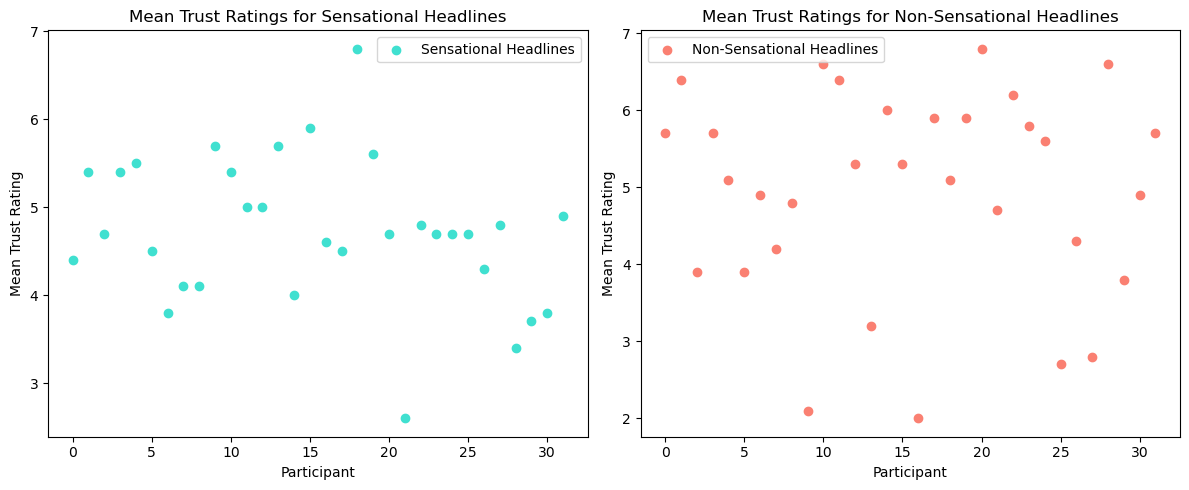

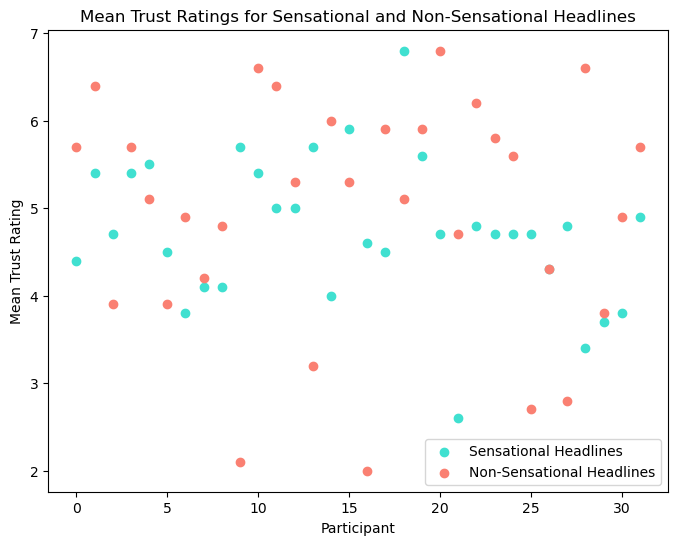

In [8]:
# Separate scatter plots for sensational_df and non_sensational_df
plt.figure(figsize=(12, 5))

# Sensational Headlines Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(sensational_df)), sensational_df['Mean_Sensational_Rating'], color='turquoise', label='Sensational Headlines')
plt.xlabel('Participant')
plt.ylabel('Mean Trust Rating')
plt.title('Mean Trust Ratings for Sensational Headlines')
plt.legend()

# Non-Sensational Headlines Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(range(len(non_sensational_df)), non_sensational_df['Mean_Non_Sensational_Rating'], color='salmon', label='Non-Sensational Headlines')
plt.xlabel('Participant')
plt.ylabel('Mean Trust Rating')
plt.title('Mean Trust Ratings for Non-Sensational Headlines')
plt.legend()

plt.tight_layout()
plt.show()

# Combined Scatter Plot for both groups
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sensational_df)), sensational_df['Mean_Sensational_Rating'], color='turquoise', label='Sensational Headlines')
plt.scatter(range(len(non_sensational_df)), non_sensational_df['Mean_Non_Sensational_Rating'], color='salmon', label='Non-Sensational Headlines')
plt.xlabel('Participant')
plt.ylabel('Mean Trust Rating')
plt.title('Mean Trust Ratings for Sensational and Non-Sensational Headlines')
plt.legend()
plt.show()


# Raincloud plot

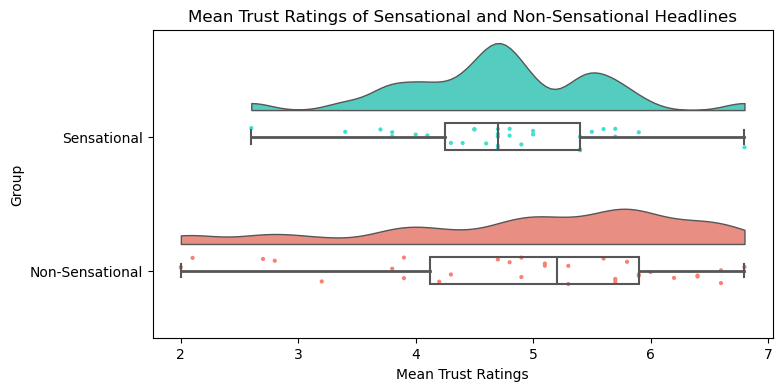

In [9]:
# Combining the mean ratings into a single DataFrame for a raincloud plot
combined_data = pd.concat([
    pd.DataFrame({'Condition': 'Sensational', 'Rating': sensational_df['Mean_Sensational_Rating']}),
    pd.DataFrame({'Condition': 'Non-Sensational', 'Rating': non_sensational_df['Mean_Non_Sensational_Rating']})
])

# Visualising a raincloud plot
plt.figure(figsize=(8, 4))
ax = pt.RainCloud(x='Condition', y='Rating', data=combined_data, orient='h', width_viol=1, width_box=0.2, palette=['turquoise', 'salmon'])
plt.xlabel('Mean Trust Ratings')
plt.ylabel('Group')
plt.title('Mean Trust Ratings of Sensational and Non-Sensational Headlines')
plt.show()

# Histograms

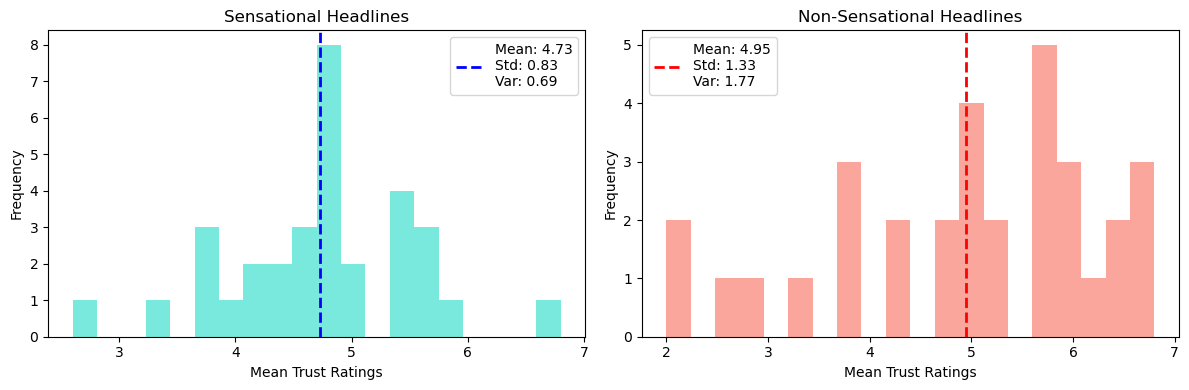

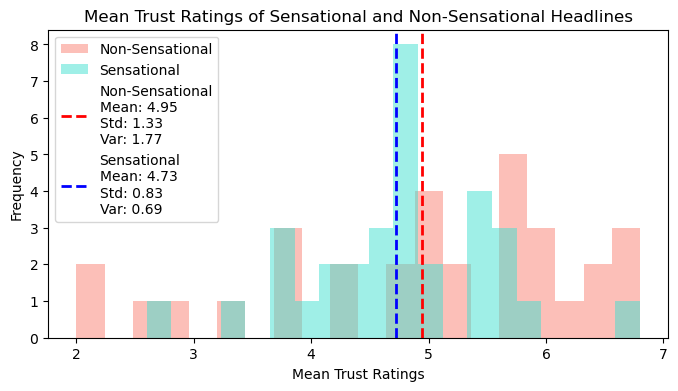

In [10]:
# Create separate histograms
plt.figure(figsize=(12, 4))

# Plotting histogram for Sensational condition
plt.subplot(1, 2, 1)
sensational_data = combined_data[combined_data['Condition'] == 'Sensational']
plt.hist(sensational_data['Rating'], bins=20, color='turquoise', alpha=0.7)
plt.xlabel('Mean Trust Ratings')
plt.ylabel('Frequency')
plt.title('Sensational Headlines')

# Annotate with mean, standard deviation, and variance
mean_sensational = sensational_data['Rating'].mean()
std_sensational = sensational_data['Rating'].std()
var_sensational = sensational_data['Rating'].var()
plt.axvline(mean_sensational, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sensational:.2f}\nStd: {std_sensational:.2f}\nVar: {var_sensational:.2f}')
plt.legend()

# Plotting histogram for Non-Sensational condition
plt.subplot(1, 2, 2)
non_sensational_data = combined_data[combined_data['Condition'] == 'Non-Sensational']
plt.hist(non_sensational_data['Rating'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Mean Trust Ratings')
plt.ylabel('Frequency')
plt.title('Non-Sensational Headlines')

# Annotate with mean, standard deviation, and variance
mean_non_sensational = non_sensational_data['Rating'].mean()
std_non_sensational = non_sensational_data['Rating'].std()
var_non_sensational = non_sensational_data['Rating'].var()
plt.axvline(mean_non_sensational, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_non_sensational:.2f}\nStd: {std_non_sensational:.2f}\nVar: {var_non_sensational:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Create a combined histogram
plt.figure(figsize=(8, 4))

# Plotting histograms for each condition on the same plot
for condition, data in combined_data.groupby('Condition'):
    plt.hist(data['Rating'], alpha=0.5, label=condition, bins=20, color='turquoise' if condition == 'Sensational' else 'salmon')

# Annotate with mean, standard deviation, and variance for each condition
for condition, data in combined_data.groupby('Condition'):
    mean = data['Rating'].mean()
    std = data['Rating'].std()
    var = data['Rating'].var()
    plt.axvline(mean, color='blue' if condition == 'Sensational' else 'red', linestyle='dashed', linewidth=2, label=f'{condition}\nMean: {mean:.2f}\nStd: {std:.2f}\nVar: {var:.2f}')

plt.xlabel('Mean Trust Ratings')
plt.ylabel('Frequency')
plt.title('Mean Trust Ratings of Sensational and Non-Sensational Headlines')
plt.legend()
plt.show()


# Mann-Whitney U Test

In [11]:
# Dataframes which contain only the 10 columns with the ratings
# Splitting the data into two separate dataframes

# Loading the data
data_ = pd.read_csv('/Users/sararehman/Downloads/Truststudy_data/data.csv')
data_

#non-sensational trust ratings
df_ns = data_[['NS1_1','NS2_1','NS3_1','NS4_1','NS5_1','NS6_1','NS7_1','NS8_1','NS9_1','NS10_1']]
df_ns = df_ns.dropna()

#sensational trust ratings
df_s = data_[['S11_1','S12_1','S13_1','S14_1','S15_1','S16_1','S17_1','S18_1','S19_1','S20_1']]
df_s = df_s.dropna()

In [12]:
# Define the Mann–Whitney U test function
def mann_whitney_test(df1, df2):
    statistic, p_value = mannwhitneyu(df1.values.flatten(), df2.values.flatten(), alternative='two-sided')
    return statistic, p_value

# Perform the Mann–Whitney U test
statistic, p_value = mann_whitney_test(df_ns, df_s)

# Display the results
print(f"Mann–Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Rejecting the null hypothesis. There is a significant difference in trust levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in trust levels.")

Mann–Whitney U statistic: 56705.5
P-value: 0.01651796717090242
Rejecting the null hypothesis. There is a significant difference in trust levels.


# Bootstrapping

In [13]:
# Define the Mann–Whitney U test function
def mann_whitney_test(data1, data2):
    statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    return statistic, p_value

# Define a function for bootstrapping
def bootstrap_statistic(data1, data2, statistic_func, num_samples):
    n1, n2 = len(data1), len(data2)
    results = []
    combined_data = np.concatenate((data1, data2))

    for _ in range(num_samples):
        # Resample with replacement
        resampled_data = np.random.choice(combined_data, size=n1 + n2, replace=True)

        # Calculate the statistic of interest
        resampled_statistic, _ = statistic_func(resampled_data[:n1], resampled_data[n1:])
        results.append(resampled_statistic)

    return results

# Perform bootstrapping for Mann–Whitney U test
num_bootstraps = 1000  # Adjustable
bootstrapped_results = bootstrap_statistic(df_ns.values.flatten(), df_s.values.flatten(), mann_whitney_test, num_bootstraps)

# Calculate the confidence interval for the Mann–Whitney U statistic
confidence_interval = np.percentile(bootstrapped_results, [2.5, 97.5])

# Display the results
print(f"Mann–Whitney U statistic: {mann_whitney_test(df_ns.values.flatten(), df_s.values.flatten())[0]}")
print(f"P-value: {mann_whitney_test(df_ns.values.flatten(), df_s.values.flatten())[1]}")
print(f"Bootstrapped 95% Confidence Interval for U statistic: {confidence_interval}")

# Interpret the results
alpha = 0.05
if mann_whitney_test(df_ns.values.flatten(), df_s.values.flatten())[1] < alpha:
    print("Rejecting the null hypothesis. There is a significant difference in trust levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in trust levels.")


Mann–Whitney U statistic: 56705.5
P-value: 0.01651796717090242
Bootstrapped 95% Confidence Interval for U statistic: [46538.8875 55639.6   ]
Rejecting the null hypothesis. There is a significant difference in trust levels.


# Cliff's Delta

In [14]:
def cliffs_delta(lst1, lst2):
    """
    Calculate Cliff's Delta between two lists.
    """
    m, n = len(lst1), len(lst2)
    u, d = 0, 0

    for i in range(m):
        for j in range(n):
            if lst1[i] < lst2[j]:
                u += 1
            elif lst1[i] > lst2[j]:
                d += 1

    return (d - u) / (m * n)

# Example usage:
cliffs_delta_value = cliffs_delta(df_ns.values.flatten(), df_s.values.flatten())
print(f"Cliff's Delta: {cliffs_delta_value}")


Cliff's Delta: 0.107529296875


# Cohen's D

In [15]:
def cohens_d(lst1, lst2):
    """
    Calculate Cohen's d between two lists.
    """
    mean_diff = np.mean(lst1) - np.mean(lst2)
    pooled_std = np.sqrt((np.std(lst1, ddof=1) ** 2 + np.std(lst2, ddof=1) ** 2) / 2)

    return mean_diff / pooled_std

# Example usage:
cohens_d_value = cohens_d(df_ns.values.flatten(), df_s.values.flatten())
print(f"Cohen's d: {cohens_d_value}")


Cohen's d: 0.12830431472171996
